<a href="https://colab.research.google.com/github/satish019/AI-challenge/blob/master/Data_Preparation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
df = sns.load_dataset('titanic')

In [ ]:
#Inspect first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
#Drop the redundant features
df = df.drop(['class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], axis = 1)

In [ ]:
#Inspect again
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Check the dimensions of the data
df.shape

(891, 8)

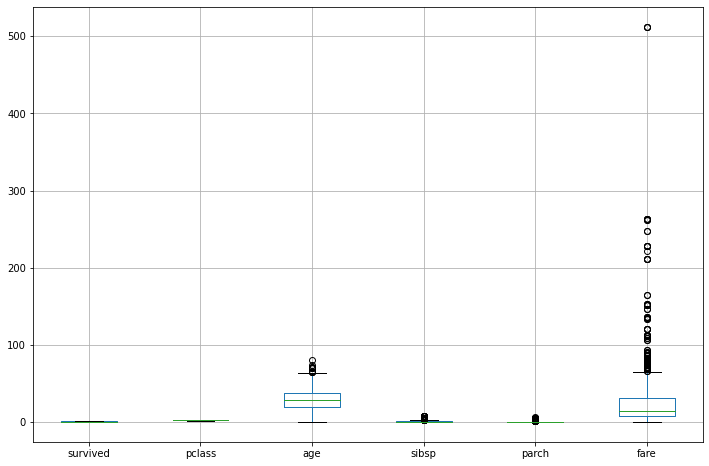

In [ ]:
#Create a boxplot for all numeric features
plt.figure(figsize=(12, 8))
df.boxplot()
plt.show()

In [ ]:
#Define a function to determine outlier boundaries
def outlier_limits(col):
  Q3, Q1 = np.nanpercentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR
  LL = Q1 - 1.5*IQR
  return UL, LL

In [ ]:
#Apply the function to your data
for column in df.columns:
  if df[column].dtype != 'object':
    UL, LL = outlier_limits(df[column])
    df[column] = np.where((df[column] > UL) | (df[column] < LL), np.nan, df[column])

In [ ]:
#Inspect the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    float64
 1   pclass    891 non-null    float64
 2   sex       891 non-null    object 
 3   age       703 non-null    float64
 4   sibsp     845 non-null    float64
 5   parch     678 non-null    float64
 6   fare      775 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(6), object(2)
memory usage: 55.8+ KB


In [ ]:
#Check columnwise missing values
df.isnull().sum()

survived      0
pclass        0
sex           0
age         188
sibsp        46
parch       213
fare        116
embarked      2
dtype: int64

In [ ]:
#Inspect the 'embarked' column
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
#Since it is a categorical column with 3 level and only 2 missing values, we'll use mode.
df['embarked'] = df['embarked'].replace(np.nan, 'S')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    float64
 1   pclass    891 non-null    float64
 2   sex       891 non-null    object 
 3   age       703 non-null    float64
 4   sibsp     845 non-null    float64
 5   parch     678 non-null    float64
 6   fare      775 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(6), object(2)
memory usage: 55.8+ KB


In [ ]:
#Now there is no missing value in 'embarked'
df.isnull().sum()

survived      0
pclass        0
sex           0
age         188
sibsp        46
parch       213
fare        116
embarked      0
dtype: int64

In [ ]:
#Call the library for Imputation Algorithms
from fancyimpute import KNN, IterativeImputer

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
#Convert the 'object' variable types to dummies
df = pd.get_dummies(df, drop_first= True)

In [ ]:
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.250,1,0,1
1,1.0,1.0,38.0,1.0,0.0,NaN,0,0,0
2,1.0,3.0,26.0,0.0,0.0,7.925,0,0,1
3,1.0,1.0,35.0,1.0,0.0,53.100,0,0,1
4,0.0,3.0,35.0,0.0,0.0,8.050,1,0,1


In [ ]:
#Copy the datafrme for subsequent treatment.
df_knn = df.copy()

In [ ]:
#Copy the datafrme for subsequent treatment.
df_mice = df.copy()

In [ ]:
#Instantiate KNN
knn = KNN()

In [ ]:
#Transform the data using KNN imputer
df_knn.iloc[:, :] = knn.fit_transform(df_knn)

Imputing row 1/891 with 0 missing, elapsed time: 0.166
Imputing row 101/891 with 0 missing, elapsed time: 0.168
Imputing row 201/891 with 0 missing, elapsed time: 0.171
Imputing row 301/891 with 1 missing, elapsed time: 0.173
Imputing row 401/891 with 0 missing, elapsed time: 0.175
Imputing row 501/891 with 0 missing, elapsed time: 0.177
Imputing row 601/891 with 1 missing, elapsed time: 0.178
Imputing row 701/891 with 1 missing, elapsed time: 0.180
Imputing row 801/891 with 0 missing, elapsed time: 0.182


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    float64
 1   pclass      891 non-null    float64
 2   age         703 non-null    float64
 3   sibsp       845 non-null    float64
 4   parch       678 non-null    float64
 5   fare        775 non-null    float64
 6   sex_male    891 non-null    uint8  
 7   embarked_Q  891 non-null    uint8  
 8   embarked_S  891 non-null    uint8  
dtypes: float64(6), uint8(3)
memory usage: 44.5 KB


In [ ]:
#No missing value after KNN imputation
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    float64
 1   pclass      891 non-null    float64
 2   age         891 non-null    float64
 3   sibsp       891 non-null    float64
 4   parch       891 non-null    float64
 5   fare        891 non-null    float64
 6   sex_male    891 non-null    float64
 7   embarked_Q  891 non-null    float64
 8   embarked_S  891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


In [ ]:
#Instantiate MICE imputer
mice = IterativeImputer(random_state=102)

In [ ]:
#No missing value after mice imputation
df_mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    float64
 1   pclass      891 non-null    float64
 2   age         891 non-null    float64
 3   sibsp       891 non-null    float64
 4   parch       891 non-null    float64
 5   fare        891 non-null    float64
 6   sex_male    891 non-null    float64
 7   embarked_Q  891 non-null    float64
 8   embarked_S  891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


In [ ]:
#Load the original data i.e. data where we didn't introduce addition missing values by converting outliers to missing values.
df = sns.load_dataset('titanic')

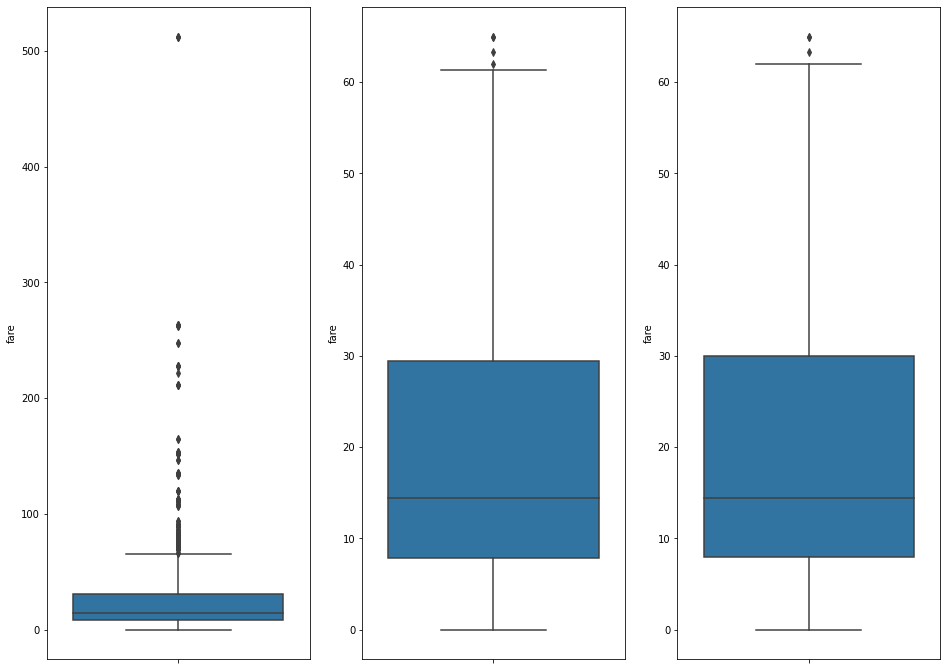

In [ ]:
#Create adjacent boxplots for 'fare'
plt.figure(figsize = (16, 12))
plt.subplot(1,3,1)
sns.boxplot(y = df.fare)

plt.subplot(1,3,2)
sns.boxplot(y = df_knn.fare)

plt.subplot(1,3,3)
sns.boxplot(y = df_mice.fare)
plt.show()